# Quiz on Chapter 6: Analyzing Data from the Rocket League Championship Series

In this quiz, you are going to be analyzing data from the 2021-2022 RLCS season. More information about this dataset can be found on [Kaggle](https://www.kaggle.com/datasets/dylanmonfret/rlcs-202122). In particular, you are going to be estimating and using differences in stats to answer 2 age-old questions:
* Which team color is better; orange or blue?
* Does applying pressure lead to more wins?

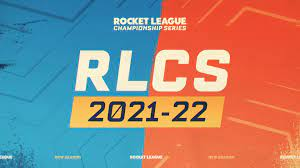

** Be sure to run the following code first! **

In [4]:
suppressPackageStartupMessages({
  library(coursekata)
})

options(repr.plot.width=12, repr.plot.height=9)

In [5]:
rl <- read.csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTssMF6kJ6AR0USIHN7N6mG1U2YQn2Aeds4xYG6aXUPUiJpfi12omw6o1QoJwpEJCQdhnLGUx5m9aqJ/pub?gid=766891133&single=true&output=csv")

str(rl)

'data.frame':	11614 obs. of  55 variables:
 $ game_id                           : chr  "616d965cf8090ec74528853c" "616d965cf8090ec74528853c" "616d9660143c37878b239c28" "616d9660143c37878b239c28" ...
 $ color                             : chr  "blue" "orange" "blue" "orange" ...
 $ team_id                           : chr  "6020bd98f1e4807cc700dc74" "6074990c8c85ced5f379e9e0" "6020bd98f1e4807cc700dc74" "6074990c8c85ced5f379e9e0" ...
 $ team_slug                         : chr  "https://octane.gg/teams/dc74-team-bds" "https://octane.gg/teams/e9e0-bs-competition" "https://octane.gg/teams/dc74-team-bds" "https://octane.gg/teams/e9e0-bs-competition" ...
 $ team_name                         : chr  "TEAM BDS" "BS+COMPETITION" "TEAM BDS" "BS+COMPETITION" ...
 $ team_region                       : chr  "Europe" "Europe" "Europe" "Europe" ...
 $ ball_possession_time              : num  139 137 138 145 150 ...
 $ ball_time_in_side                 : num  135 209 162 152 120 ...
 $ core_shots        

## (1 point) Question 1: Which team color is better; orange or red?

Pro Rocket League players have long held the superstition that whether your team is Orange or Blue during a match matters. More specifically, players talk about being slower or faster depending on their team color. In the next few questions, we're going to analyze this question to see if they're statistically correct.

There are a number of variables we could use to measure/evaluate speed, but we are just going to focus on one of them; how long they are moving as fast as possible, a.k.a. *supersonic* speed.

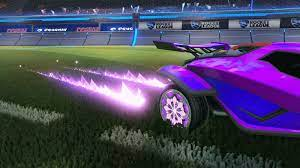

First, create a visualization that shows the relationship between ```movement_time_supersonic_speed``` and ```color``` from the ```rl``` dataset.

Add lines indicating the average supersonic speed time for each color/group.

## (2 points) Question 2

Write down an equation in GLM notation for the complex model that relates ```movement_time_supersonic_speed``` and ```color```.

Which parameter are we trying to estimate to understand if there really is a difference in average time spent going supersonic and the color of the team?

## (2 points) Question 3

Use bootstrapping to create a sampling distribution for the paramter you decided on in Question 2.

Visualize this sampling distribution and add a point for your best estimate of the parameter you're trying to estimate.

## (1 point) Question 4

Based on your visualization, what can you conclude about this question of whether or not team color impacts how fast a player moves on average? Explain your answer.

## (1 point) Question 5

If you found that there was a significant difference in average time spent at supersonic speed and team color, calculate the effect size to determine how strong that relationship is. Interperet this result as if you were giving advice professional Rocket League players.

If you did not find a significant difference, say so and get a free point!

## (3 points) Question 6

Since the beginning of professional Rocket League, there's been a lot of discussion about what the "META" (most effective tactics available) should be? Two camps started to evolve during this 2021-2022 season. 

One set of players claimed that you win through good defense and simply let your opponents mess up. After all, most players agree that defense is easier than offense.

However, another set of players claimed that being consistent in defense is actually harder and that you should pressure the ball into their side of the field as much as possible.

To settle this debate, we want to see if pressure has a relationship with whether or not a player wins by looking at the variables ```ball_time_in_side``` and ```winner```.

* Calculate a confidence interval for the difference in average time spent on a player's side of the field (```ball_time_in_side```) between winners and losers (```winner```).
* Use this confidence interval to conclude whether it's better to apply pressure or stay on your side of the field.
* Determine how strong the relationship is if it exists.

Notes:
* The variable ```ball_time_in_side``` measures how many seconds a player spends on their half of the field (vs being on the opponent's side). Lower values indicate higher pressure (since you're either on your side or not).
* You may use bootstrapping or a function to calculate the confidence interval.
* If you use a function to calculate the confidence interval, you need to justify the assumptions behind using that function.

Warning message:
“Removed 275 rows containing missing values (`geom_point()`).”


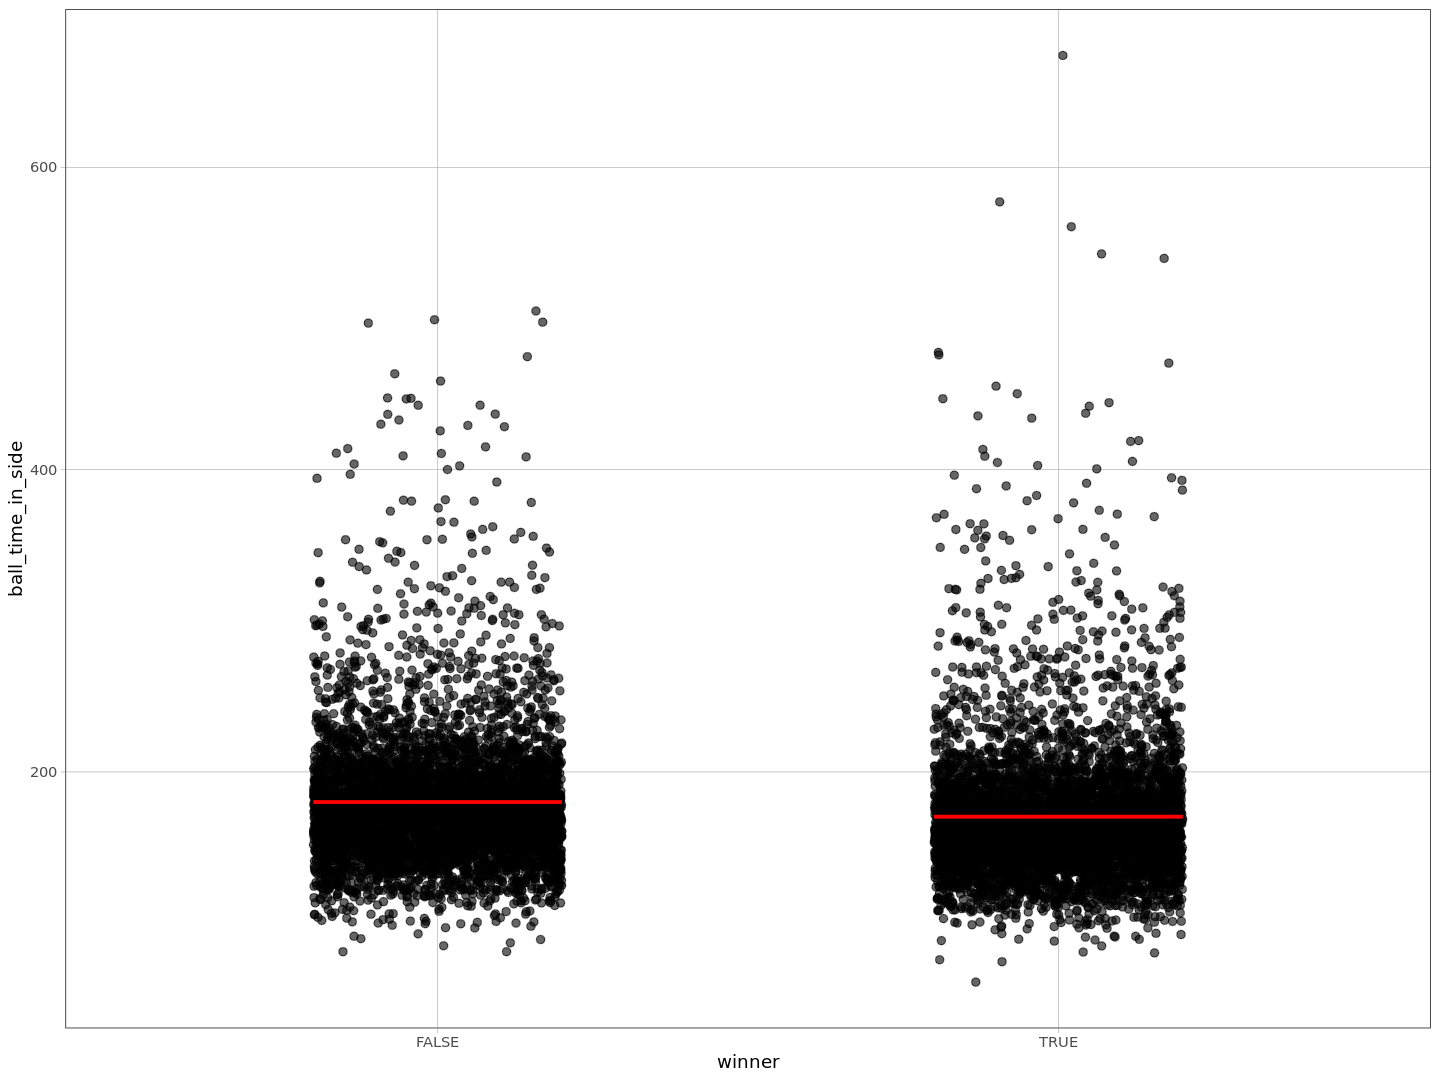

In [12]:
gf_jitter(ball_time_in_side ~ winner, data=rl, width=0.2) %>%
    gf_model(ball_time_in_side ~ winner, color='red')

In [13]:
sdob1 <- do(1000)*b1(ball_time_in_side ~ winner, data=resample(rl))
sample_b1 <- b1(ball_time_in_side ~ winner, data=rl)

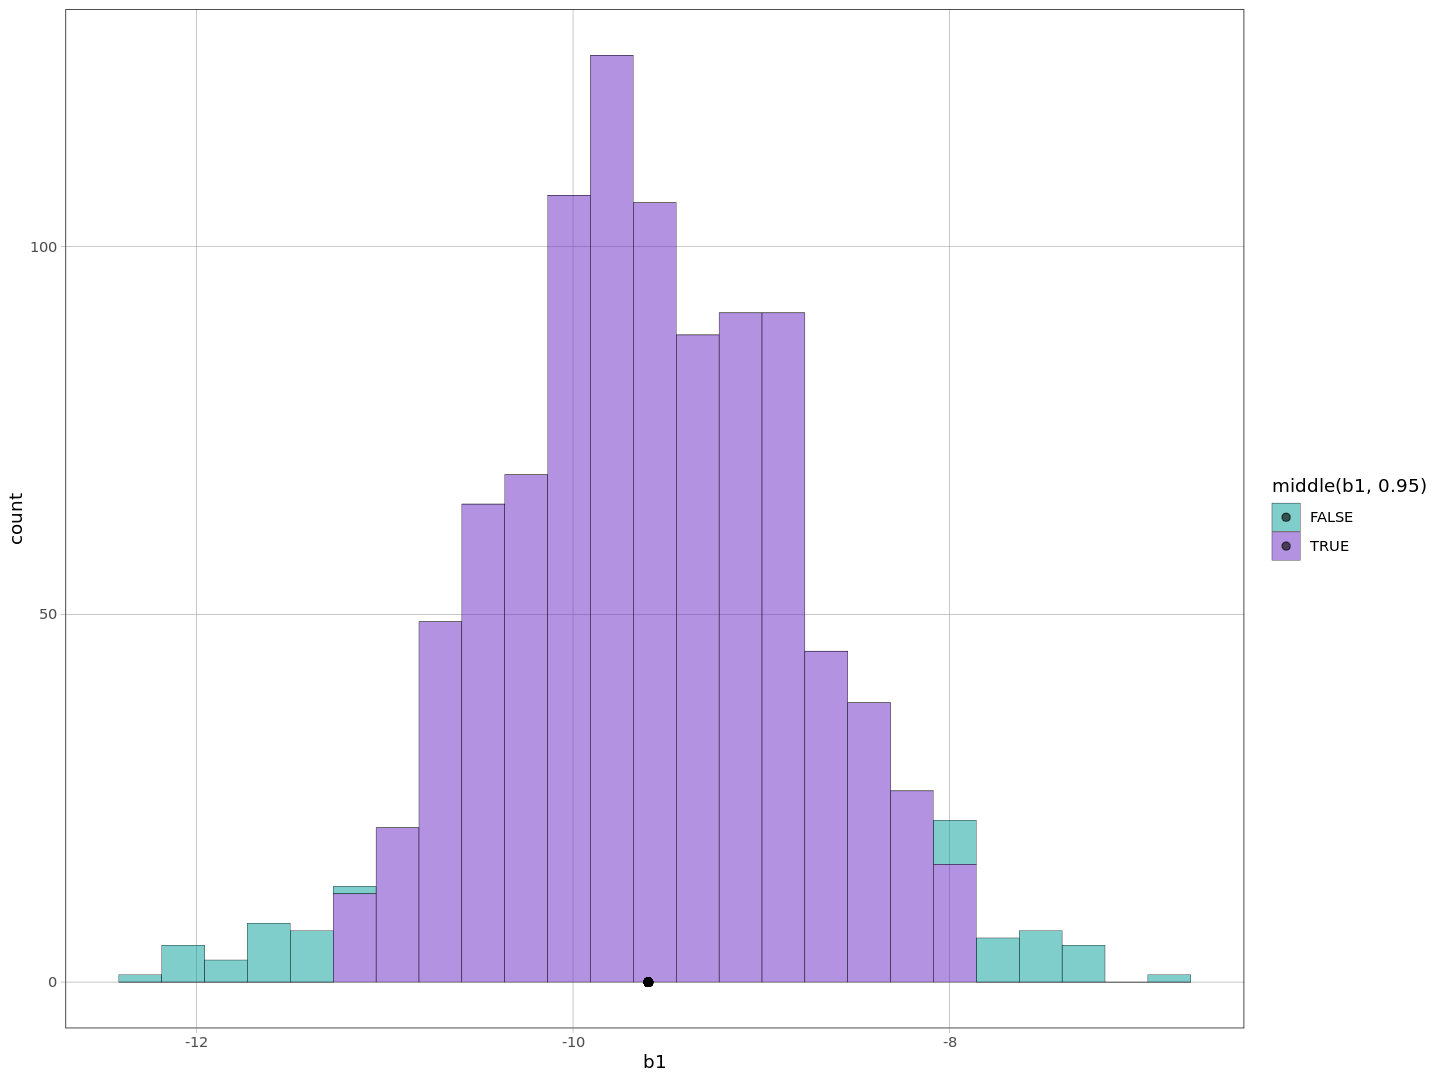

In [14]:
gf_histogram(~b1, data=sdob1, fill=~middle(b1,0.95)) %>%
    gf_point(x = sample_b1, y = 0)

In [15]:
confint(lm(ball_time_in_side ~ winner, data=rl))

,2.5 %,97.5 %
(Intercept),178.87925,181.158967
winnerTRUE,-11.20454,-7.995071
